# Drowsiness Detection using YOLO, Pytorch and Python


### 1. Install Dependencies and setup

In [20]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [21]:
!git clone https://github.com/ultralytics/yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [22]:
%cd yolov5

c:\Users\User\Desktop\DrowsinessDetection\yolov5


In [23]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [24]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### 2. Load Model

In [25]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-8-29 Python-3.10.12 torch-2.4.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [26]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### 3. Make Detections

In [5]:
img1 = "https://ultralytics.com/images/zidane.jpg"
result1 = model(img1)
result1.print()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 2464.8ms pre-process, 86.9ms inference, 14.7ms NMS per image at shape (1, 3, 384, 640)


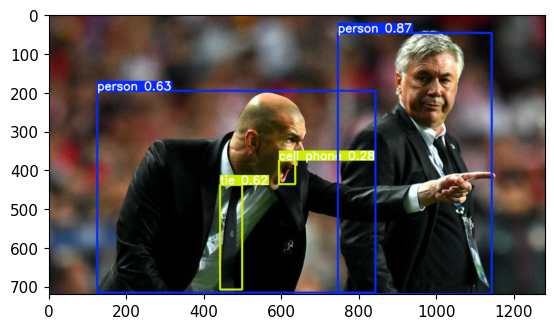

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(result1.render()))
plt.show()

In [7]:
img2 = "https://ultralytics.com/images/bus.jpg"
result2 = model(img2)
result2.print()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1080x810 4 persons, 1 bus
Speed: 3139.7ms pre-process, 112.0ms inference, 8.1ms NMS per image at shape (1, 3, 640, 480)


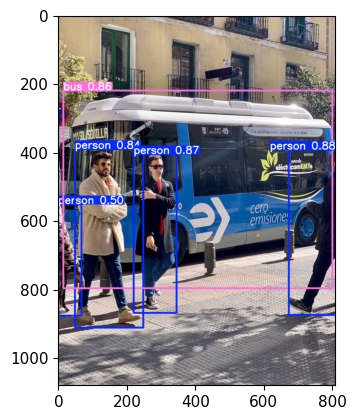

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(result2.render()))
plt.show()

In [9]:
result1.xyxy   # the output is as follows xmin, ymin, xmax, ymax, confidence, class

[tensor([[7.45563e+02, 4.84232e+01, 1.14276e+03, 7.20000e+02, 8.69361e-01, 0.00000e+00],
         [1.24165e+02, 1.97314e+02, 8.42482e+02, 7.16561e+02, 6.27424e-01, 0.00000e+00],
         [4.41338e+02, 4.39452e+02, 4.98282e+02, 7.08494e+02, 6.15022e-01, 2.70000e+01],
         [5.93968e+02, 3.76730e+02, 6.35397e+02, 4.37150e+02, 2.76734e-01, 6.70000e+01]])]

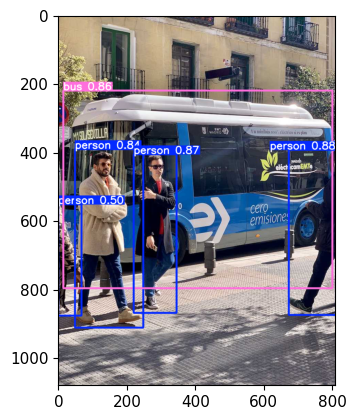

In [10]:
# result1.show()
# result2.show()
# np.array(results.render()).shape
# plt.imshow(np.squeeze(result1.render()))
plt.imshow(np.squeeze(result2.render()))

In [11]:
img3 = "https://media.drive.com.au/obj/tx_q:70,rs:auto:1280:720:1/caradvice/private/aae267a6b7edd3532c3d49f1971a198f"
result3 = model(img3)
result3.print()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 25 cars, 6 trucks
Speed: 191.5ms pre-process, 78.6ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


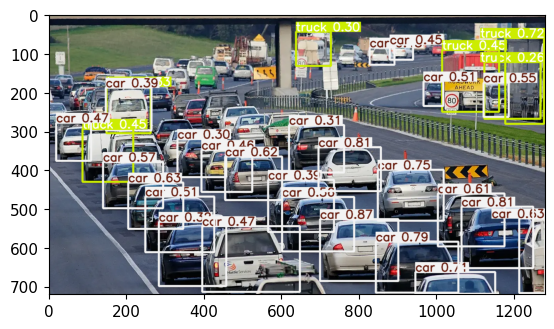

In [12]:
%matplotlib inline
plt.imshow(np.squeeze(result3.render()))
plt.show()

### 4. Real Time Detection

In [13]:
 #for video detection  detection
import cv2
import numpy as np

cap = cv2.VideoCapture("traffic.mp4")

desired_width = 640
desired_height = 480

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    resized_frame = cv2.resize(frame, (desired_width, desired_height))
    results = model(resized_frame)
    output_frame = np.squeeze(results.render())
    
    cv2.imshow('YOLO', output_frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm

In [14]:
#for real time detection
import cv2

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\comm

### 5. Train from scratch

In [28]:
#first import couple of dependencies
import uuid # to make unique identifiers
import os
import time

In [29]:
IMAGES_PATH = os.path.join("data", "images") #/data/images
labels = ["awake", "drowsy"]
number_imgs = 20

In [6]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        # Webcam feed
        ret, frame = cap.read()
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [30]:
os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg')

'data\\images\\awake.0ca70019-65cd-11ef-b108-387a0ea03623.jpg'

In [31]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.0e113ab5-65cd-11ef-b8c0-387a0ea03623.jpg
data\images\awake.0e113ab6-65cd-11ef-8455-387a0ea03623.jpg
data\images\awake.0e113ab7-65cd-11ef-bbc2-387a0ea03623.jpg
data\images\awake.0e113ab8-65cd-11ef-8b10-387a0ea03623.jpg
data\images\awake.0e113ab9-65cd-11ef-99eb-387a0ea03623.jpg
data\images\awake.0e113aba-65cd-11ef-bfc4-387a0ea03623.jpg
data\images\awake.0e113abb-65cd-11ef-8aa5-387a0ea03623.jpg
data\images\awake.0e113abc-65cd-11ef-85b0-387a0ea03623.jpg
data\images\awake.0e113abd-65cd-11ef-a995-387a0ea03623.jpg
data\images\awake.0e113abe-65cd-11ef-b4e4-387a0ea03623.jpg
data\images\awake.0e113abf-65cd-11ef-8b4e-387a0ea03623.jpg
data\images\awake.0e113ac0-65cd-11ef-953e-387a0ea03623.jpg
data\images\awake.0e113ac1-65cd-11ef-8d0f-387a0ea03623.jpg
data\images\awake.0e113ac2-65cd-11ef-9c12-387a0ea03623.jpg
data\images\awake.0e113ac3-65cd-11ef-b705-387a0ea03623.jpg
data\images\awake.0e113ac4-65cd-11ef-ae9b-387a0ea03623.jpg
data\images\awake.0e113ac5-65cd-11ef-b582-387a0ea03623.j

In [32]:
!git clone https://github.com/HumanSignal/labelImg

^C


Cloning into 'labelImg'...


In [23]:
%pip install pyqt5 lxml --upgrade
#compiles the resources.qrc file into resources.py within the libs directory
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Note: you may need to restart the kernel to use updated packages.


In [33]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

The system cannot find the path specified.


### 6. Load Model

In [37]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2024-8-29 Python-3.10.12 torch-2.4.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [48]:
img = os.path.join('data', 'images', 'awake.514157fe-65ab-11ef-a4ac-387a0ea03623.jpg')

In [49]:
results = model(img)

C:\Users\User/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [53]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 13.3ms pre-process, 68.3ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


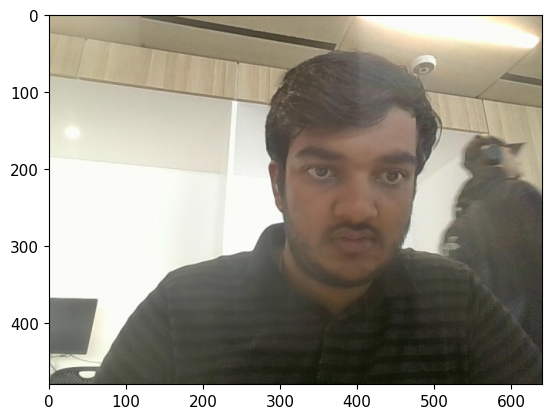

In [54]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()